In [ ]:
!pip install bayesian-optimization

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 6.0 MB/s eta 0:00:00


In [ ]:


import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns #permite generar fácilmente gráficos
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Importar el clasificador SVM
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [ ]:
# Especifica la ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/DATASET_BALANCEADO_LIST.csv'
df = pd.read_csv(file_path)
df

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,3,1,2,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
11763,4,2,5,4,2,2,2,2,3,6
11764,4,2,5,4,2,2,2,2,3,6
11765,4,2,5,4,2,2,2,2,3,6
11766,4,2,5,4,2,2,2,2,3,6


In [ ]:


#verifico datos nulos
df.isnull().sum()

,0
DIA,0
HORA_INFRACCION,0
ARMA,0
EDAD,0
LUGAR,0
SEXO,0
ANTECEDENTES,0
AREA_DEL_HECHO,0
DISTRITO,0
PRESUNTA_MOTIVACION,0


In [ ]:

ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El número de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El número de columnas(variables) es: ",len(ds.columns))

El número de filas(observaciones) es:  11768
El número de columnas(variables) es:  10


In [ ]:

# tipos de la variables
ds.dtypes

,0
DIA,int64
HORA_INFRACCION,int64
ARMA,int64
EDAD,int64
LUGAR,int64
SEXO,int64
ANTECEDENTES,int64
AREA_DEL_HECHO,int64
DISTRITO,int64
PRESUNTA_MOTIVACION,int64


In [ ]:
print(df['PRESUNTA_MOTIVACION'].unique())# datos en texto

[1 2 3 4 5 6]


In [ ]:
print(df['DISTRITO'].unique())# datos en texto

[2 1 3]


In [ ]:
print(df['ANTECEDENTES'].unique())# datos en texto

[1 2]


In [ ]:
print(df['AREA_DEL_HECHO'].unique())# datos en texto

[1 2]


In [ ]:
print(df['LUGAR'].unique())# datos en texto

[1 2]


In [ ]:
print(df['DIA'].unique())# datos en texto

[3 2 4 1]


In [ ]:
df['DIA'].value_counts()

,count
DIA,
1,3941
2,2717
3,2700
4,2410


In [ ]:
print(df['EDAD'].unique())# datos en texto

[1 2 3 4]


In [ ]:
print(df['HORA_INFRACCION'].unique())# datos en texto

[0 2 3 1]


In [ ]:
print(df['ARMA'].unique())# datos en texto

[1 2 3 4 5]


In [ ]:
print(df['SEXO'].unique())# datos en texto

[1 2]


In [ ]:
df.head()

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,3,1,2,1,1,1,1,1,2


In [ ]:
df.sample(10)

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
8353,1,0,2,1,2,2,2,2,1,3
6965,1,0,2,1,1,2,1,2,1,1
9527,3,1,3,3,2,2,2,2,2,4
625,1,0,1,2,2,1,1,1,1,2
9327,3,1,3,3,2,2,2,2,2,4
8905,2,1,3,1,2,2,2,2,2,4
4576,3,2,1,2,1,1,1,1,3,2
5379,3,3,1,2,1,1,1,1,2,2
1102,4,3,1,2,1,1,1,1,2,2
4551,4,1,4,2,2,1,1,1,2,2


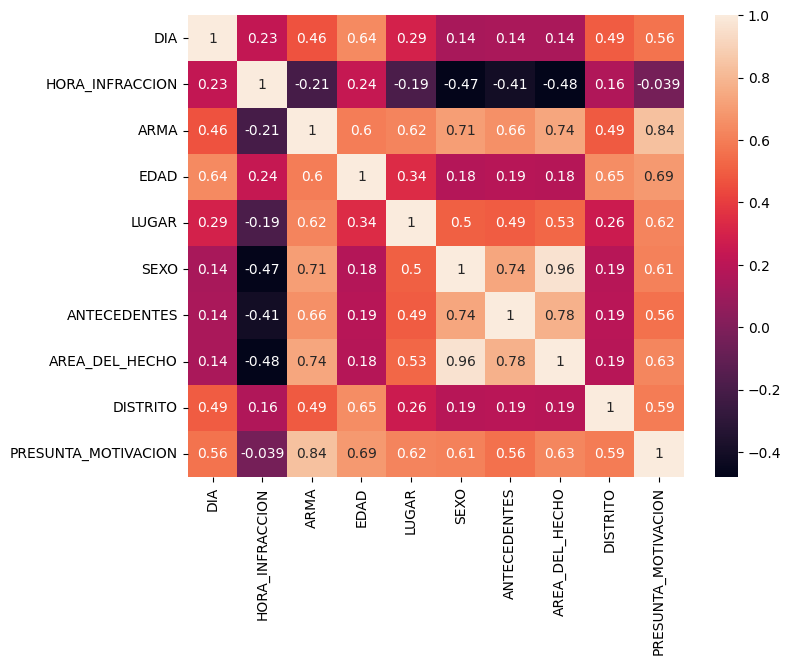

In [ ]:

#corelacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:

X = df.iloc[:, [3,7,9,0,8,5,4,6,1]] # atributos de entrada seran las primeras columnas
Y = df.iloc[:,[2]] # atributos de destino

#presentacion de los atributos de entrada
X.head()

,EDAD,AREA_DEL_HECHO,PRESUNTA_MOTIVACION,DIA,DISTRITO,SEXO,LUGAR,ANTECEDENTES,HORA_INFRACCION
0,1,1,1,3,2,1,1,1,0
1,2,1,2,3,1,1,1,1,2
2,2,1,2,2,1,1,2,1,0
3,3,1,1,4,3,1,1,1,2
4,2,1,2,3,1,1,1,1,3


In [ ]:

#presentacion de los atributos de destino
Y.head()

,ARMA
0,1
1,2
2,2
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 9414 datos para entrenamiento y 2354 datos para prueba


In [ ]:


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9414 entries, 80 to 9412
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   EDAD                 9414 non-null   int64
 1   AREA_DEL_HECHO       9414 non-null   int64
 2   PRESUNTA_MOTIVACION  9414 non-null   int64
 3   DIA                  9414 non-null   int64
 4   DISTRITO             9414 non-null   int64
 5   SEXO                 9414 non-null   int64
 6   LUGAR                9414 non-null   int64
 7   ANTECEDENTES         9414 non-null   int64
 8   HORA_INFRACCION      9414 non-null   int64
dtypes: int64(9)
memory usage: 735.5 KB


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from bayes_opt import BayesianOptimization
# Función para evaluar el modelo SVM con diferentes kernels, parámetros C y decision_function_shape
def svm_evaluate(C, kernel, decision_function_shape):
    kernel_map = {
        0: 'linear',    # Kernel lineal
        1: 'poly',      # Kernel polinómico
        2: 'rbf',       # Kernel de función de base radial
        3: 'sigmoid'    # Kernel sigmoidal
    }
    # Mapeo del valor decision_function_shape (0 = 'ovo', 1 = 'ovr')
    decision_function_shape_map = {
        0: 'ovo',       # Uno contra uno
        1: 'ovr'        # Uno contra todos
    }
    # Convertimos el kernel en un valor entero y lo mapeamos
    svc = SVC(C=C, kernel=kernel_map[int(kernel)], decision_function_shape=decision_function_shape_map[int(decision_function_shape)], random_state=7)
    # Ajustamos el modelo con los datos de entrenamiento
    svc.fit(X_train, y_train.values.ravel())
    # Predicción en el conjunto de prueba
    y_pred = svc.predict(X_test)
    # Devolvemos el precision_score ponderado
    return precision_score(y_test, y_pred, average='micro')
# Definir los límites para los hiperparámetros, incluyendo decision_function_shape
pbounds = {
    'C': (1, 100),                      # El parámetro C varía entre 1 y 100
    'kernel': (0, 3),                    # Valor entero entre 0 y 3 para mapear los kernels ('linear', 'poly', 'rbf', 'sigmoid')
    'decision_function_shape': (0, 1)    # 0 para 'ovo' y 1 para 'ovr'
}
# Inicializar el optimizador bayesiano
optimizer = BayesianOptimization(
    f=svm_evaluate,  # Función objetivo que queremos maximizar
    pbounds=pbounds, # Límites de búsqueda para los hiperparámetros
    random_state=7
)
# Ejecutar el proceso de optimización
optimizer.maximize(
    init_points=5,   # Número de exploraciones aleatorias iniciales
    n_iter=20        # Número de iteraciones de optimización
)
# Imprimir los mejores parámetros encontrados redondeados
best_params = optimizer.max['params']
best_params['C'] = round(best_params['C'], 2)
best_params['kernel'] = int(round(best_params['kernel']))
best_params['decision_function_shape'] = int(round(best_params['decision_function_shape']))
# Mapeo final de los valores encontrados
decision_function_shape_map = {0: 'ovo', 1: 'ovr'}
kernel_map = {0: 'linear', 1: 'poly', 2: 'rbf', 3: 'sigmoid'}
best_params['decision_function_shape'] = decision_function_shape_map[best_params['decision_function_shape']]
best_params['kernel'] = kernel_map[best_params['kernel']]
# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", best_params)
# Evaluar el modelo final con los mejores hiperparámetros
svc_best = SVC(C=best_params['C'], kernel=best_params['kernel'], decision_function_shape=best_params['decision_function_shape'], random_state=7)
svc_best.fit(X_train, y_train.values.ravel())
y_pred_best = svc_best.predict(X_test)
# Calcular precisión final
precision_final = precision_score(y_test, y_pred_best, average='micro') * 100
# Imprimir la precisión final como porcentaje
print(f"Precisión final del modelo: {precision_final:.2f}%")

|   iter    |  target   |     C     | decisi... |  kernel   |
-------------------------------------------------------------
| 1         | 0.8997    | 8.555     | 0.7799    | 1.315     |
| 2         | 0.9006    | 72.62     | 0.978     | 1.615     |
| 3         | 0.8883    | 50.61     | 0.07205   | 0.8053    |
| 4         | 0.8993    | 50.49     | 0.6792    | 2.411     |
| 5         | 0.8883    | 38.71     | 0.06594   | 0.8644    |
| 6         | 0.8993    | 50.7      | 0.8293    | 2.866     |
| 7         | 0.8972    | 71.51     | 0.7816    | 2.616     |
| 8         | 0.8972    | 73.92     | 0.4434    | 2.062     |
| 9         | 0.8883    | 72.22     | 0.5935    | 0.2878    |
| 10        | 0.8972    | 72.85     | 0.8938    | 2.508     |
| 11        | 0.8993    | 49.67     | 0.7318    | 2.973     |
| 12        | 0.9023    | 9.247     | 0.6083    | 2.268     |
| 13        | 0.9023    | 8.387     | 0.9434    | 2.736     |
| 14        | 0.9023    | 8.079     | 0.0149    | 2.394     |
| 15    

In [ ]:
# Cargamos la librería Support Vector Classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Llamamos al constructor de Support Vector Machine
classifier = SVC(kernel='rbf', C=13.1, decision_function_shape='ovo')

# Entrenamos el modelo
svm_modelo = classifier.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

# Resumen de las predicciones hechas por el clasificador
from sklearn import metrics
reporte = metrics.classification_report(y_test, y_pred,output_dict=True)
pre = pd.DataFrame(reporte).transpose()
print(pre)
pre.to_excel("resumen_arma.xlsx")

              precision    recall  f1-score      support
1              0.888406  0.998371  0.940184  1228.000000
2              0.900000  0.745989  0.815789   374.000000
3              0.877637  0.806202  0.840404   258.000000
4              1.000000  0.717742  0.835681   248.000000
5              0.939759  0.951220  0.945455   246.000000
accuracy       0.902719  0.902719  0.902719     0.902719
macro avg      0.921160  0.843905  0.875503  2354.000000
weighted avg   0.906191  0.902719  0.899026  2354.000000


In [ ]:
from sklearn import metrics
import pandas as pd

reporte = metrics.classification_report(y_test, y_pred, output_dict=True)

# Extraer solo la precisión de cada clase, excluyendo métricas agregadas
precision = {class_name: metrics['precision'] for class_name, metrics in reporte.items() if isinstance(metrics, dict)}

# Convertir a DataFrame
precision_df = pd.DataFrame(list(precision.items()), columns=['Clase', 'Precisión'])

# Imprimir el DataFrame
print(precision_df)


          Clase  Precisión
0             1   0.888406
1             2   0.900000
2             3   0.877637
3             4   1.000000
4             5   0.939759
5     macro avg   0.921160
6  weighted avg   0.906191


In [ ]:

y_test.head()

,ARMA
0,1
1,3
2,1
3,4
4,1


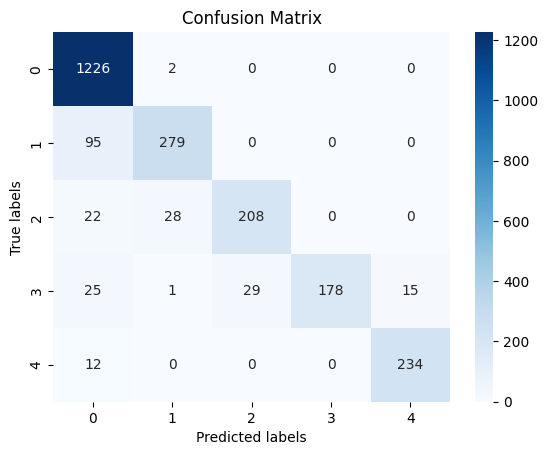

In [ ]:

#Matriz de confusion
matriz=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

In [ ]:

cm = confusion_matrix(y_test, y_pred)

mc= pd.DataFrame(cm)
print(mc)
mc.to_excel("matriz_confusion_arma.xlsx")

      0    1    2    3    4
0  1226    2    0    0    0
1    95  279    0    0    0
2    22   28  208    0    0
3    25    1   29  178   15
4    12    0    0    0  234


In [ ]:

#Para concatenar variables
import pandas as pd

prediccion = pd.DataFrame(y_pred,columns=['arma_prediccion'])
original = y_test
original.reset_index(drop=True, inplace=True)
df_combined = pd.concat([prediccion,original], axis=1)
df_combined.head(10)

,arma_prediccion,ARMA
0,1,1
1,3,3
2,1,1
3,1,4
4,1,1
5,5,5
6,4,4
7,1,1
8,3,3
9,1,1


In [ ]:
from sklearn import model_selection
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score

def v_cruzada_svm(svm_modelo, X_train, y_train):
    # Convertir y_train a un array unidimensional
    y_train = y_train.values.ravel()

    # Definir los scorers para precisión, accuracy y recall
    precision_scorer = make_scorer(precision_score, average='micro')
    accuracy_scorer = make_scorer(accuracy_score)  # No necesita parámetro average
    recall_scorer = make_scorer(recall_score, average='micro')

    seed = 7
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)  # shuffle para activar el random state

    # Realiza la validación cruzada para precisión
    cv_results_precision = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=precision_scorer)
    print("Iteraciones validación cruzada (Precisión):\n", cv_results_precision)
    msg_precision = "%f (%f)" % (cv_results_precision.mean(), cv_results_precision.std())
    print("Precisión media:\n", msg_precision)

    # Realiza la validación cruzada para accuracy
    cv_results_accuracy = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=accuracy_scorer)
    print("Iteraciones validación cruzada (Accuracy):\n", cv_results_accuracy)
    msg_accuracy = "%f (%f)" % (cv_results_accuracy.mean(), cv_results_accuracy.std())
    print("Accuracy media:\n", msg_accuracy)

    # Realiza la validación cruzada para recall
    cv_results_recall = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=recall_scorer)
    print("Iteraciones validación cruzada (Recall):\n", cv_results_recall)
    msg_recall = "%f (%f)" % (cv_results_recall.mean(), cv_results_recall.std())
    print("Recall media:\n", msg_recall)



In [ ]:
v_cruzada_svm(svm_modelo, X_train, y_train)

Iteraciones validación cruzada (Precisión):
 [0.89697292 0.90546999 0.90918747 0.89006904 0.90860786]
Precisión media:
 0.902061 (0.007416)
Iteraciones validación cruzada (Accuracy):
 [0.89697292 0.90546999 0.90918747 0.89006904 0.90860786]
Accuracy media:
 0.902061 (0.007416)
Iteraciones validación cruzada (Recall):
 [0.89697292 0.90546999 0.90918747 0.89006904 0.90860786]
Recall media:
 0.902061 (0.007416)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Assuming y_pred and y_test are defined
print('Precision: ', precision_score(y_test, y_pred, average='micro') * 100)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Recall: ', recall_score(y_test, y_pred, average='micro') * 100)

Precision:  90.27187765505522
Accuracy:  90.27187765505522
Recall:  90.27187765505522


In [ ]:
df_combined['ARMA'] = df_combined['ARMA'].apply(lambda x:
                                                'Arma fuego' if x == 1 else
                                                'Arma blanca' if x == 2 else
                                                'Sustancias y otros' if x == 3 else
                                                'Arma contundente'if x == 4 else
                                                'Arma constrictora' )



In [ ]:
df_combined['arma_prediccion'] = df_combined['arma_prediccion'].apply(lambda x:
                                                'Arma fuego' if x == 1 else
                                                'Arma blanca' if x == 2 else
                                                'Sustancias y otros' if x == 3 else
                                                'Arma contundente'if x == 4 else
                                                'Arma constrictora' )



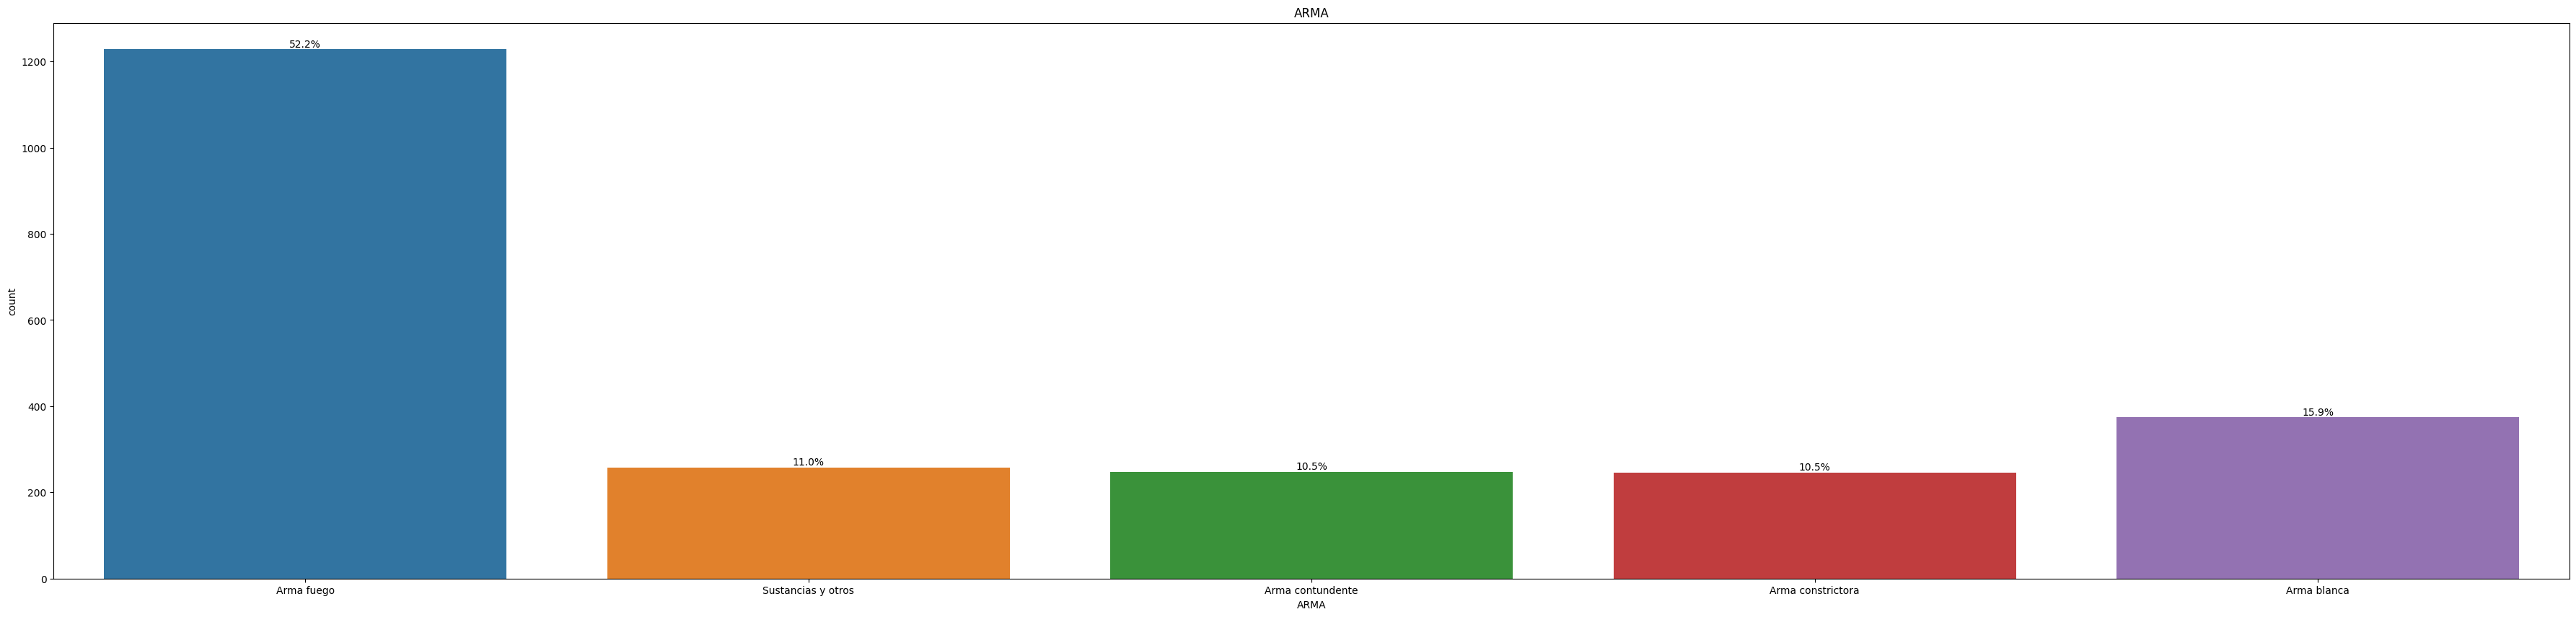

In [ ]:

import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='ARMA',hue = 'ARMA', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('ARMA')

for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras original
ax[0].savefig("barras_original_ARMA.png")

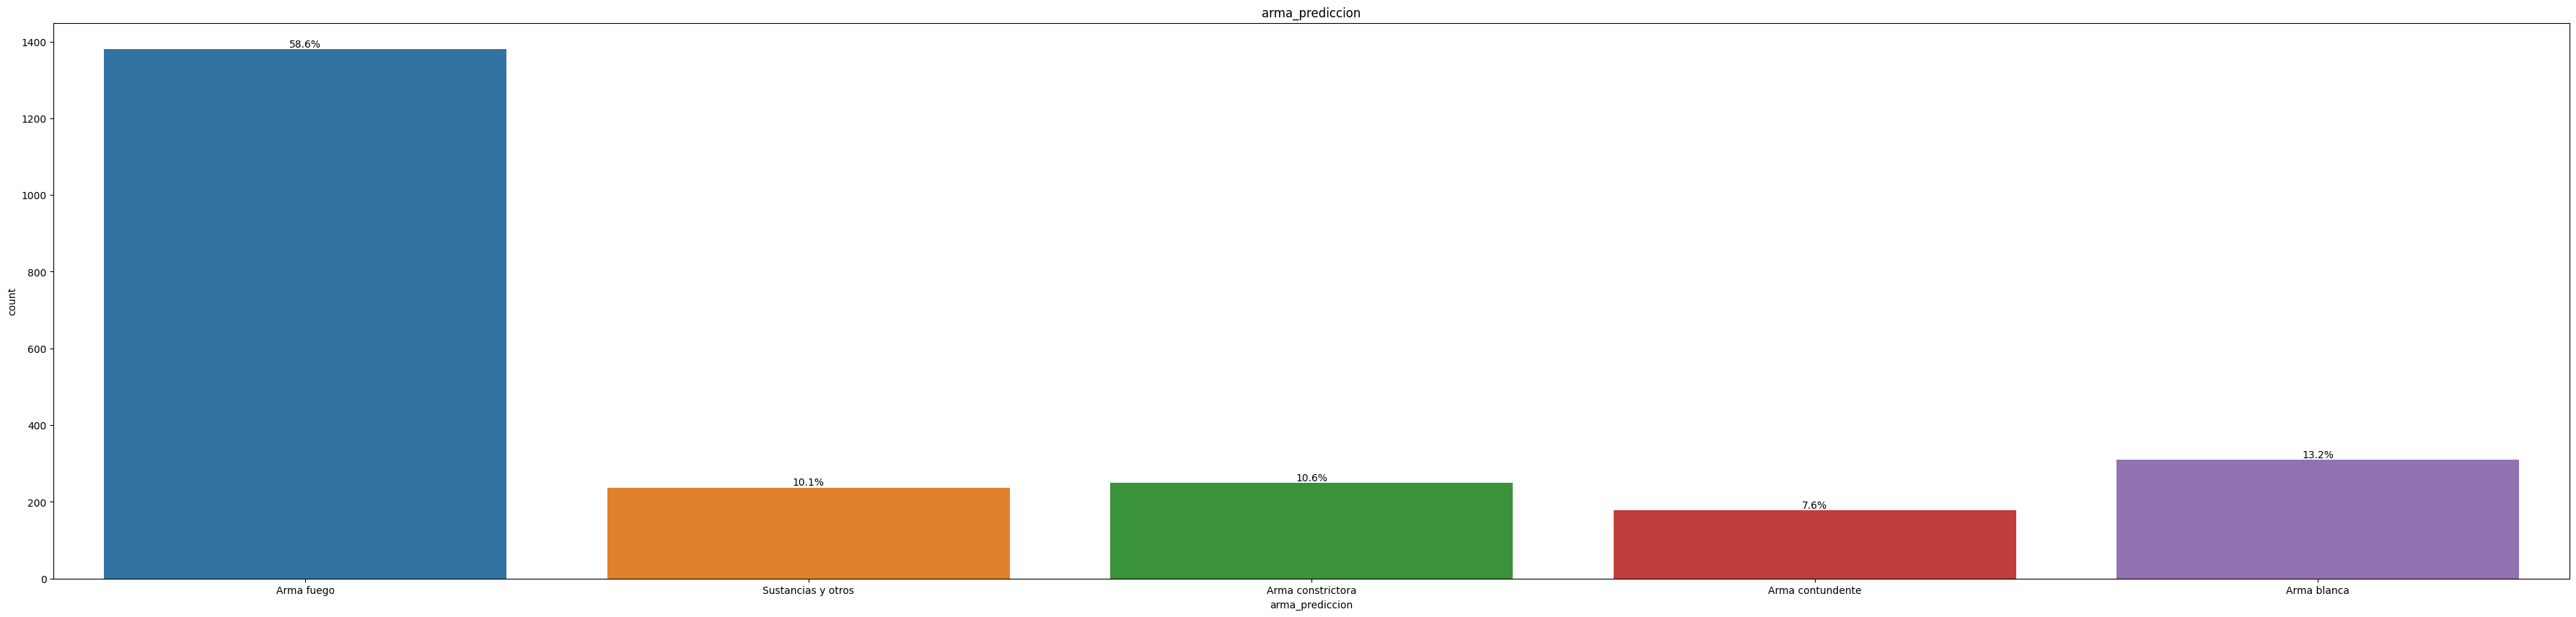

In [ ]:


ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='arma_prediccion',hue = 'arma_prediccion', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('arma_prediccion')


for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras de predicción
ax[0].savefig("barras_prediccion_arma.png")